## Задание 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

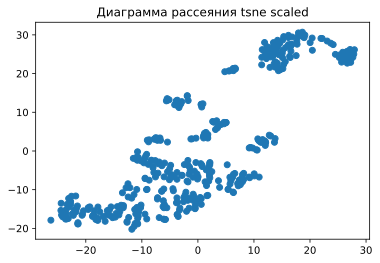

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title("Диаграмма рассеяния tsne scaled")
plt.show()

## Задание 2

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

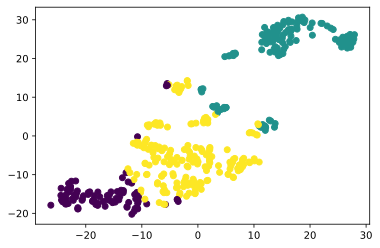

In [10]:
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [44]:
print('Price average in cluster 1 = {:2f}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Price average in cluster 2 = {:2f}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Price average in cluster 3 = {:2f}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

Price average in cluster 1 = 27.788372
Price average in cluster 2 = 16.165354
Price average in cluster 3 = 24.958115


In [45]:
print('CRIM average in cluster 1 = {:2f}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('CRIM average in cluster 2 = {:2f}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('CRIM average in cluster 3 = {:2f}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

CRIM average in cluster 1 = 0.073566
CRIM average in cluster 2 = 10.797028
CRIM average in cluster 3 = 0.421660


## * Задание 3

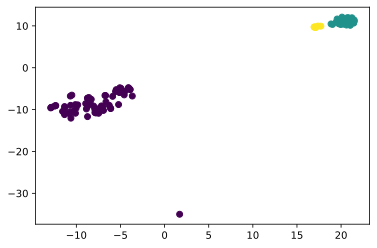

In [46]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)
labels_train = kmeans.fit_predict(X_test)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)

In [47]:
print('Price average in cluster 1 = {:2f}'.format(y_test.loc[labels_train == 0, 'price'].mean()))
print('Price average in cluster 2 = {:2f}'.format(y_test.loc[labels_train == 1, 'price'].mean()))
print('Price average in cluster 3 = {:2f}'.format(y_test.loc[labels_train == 2, 'price'].mean()))

Price average in cluster 1 = 23.911594
Price average in cluster 2 = 17.392308
Price average in cluster 3 = 12.814286


In [48]:
print('CRIM average in cluster 1 = {:2f}'.format(X_test.loc[labels_train == 0, 'CRIM'].mean()))
print('CRIM average in cluster 2 = {:2f}'.format(X_test.loc[labels_train == 1, 'CRIM'].mean()))
print('CRIM average in cluster 3 = {:2f}'.format(X_test.loc[labels_train == 2, 'CRIM'].mean()))

CRIM average in cluster 1 = 0.246421
CRIM average in cluster 2 = 8.469302
CRIM average in cluster 3 = 19.021666
